## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i,n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,activation='relu',name = 'hidden_layer'+str(i+1))(input_layer)
            
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units,activation='relu',name = 'hidden_layer'+str(i+1))(x)
            
            x = BatchNormalization()(x)
    out = keras.layers.Dense(units=output_units,activation='softmax',name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.5,1,1.5]
redice_lr_patient = [5,10,15]

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=0.5,min_lr=1e-12,monitor='val_loss',patience=5,verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.50, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizatio

Epoch 12/25
50000/50000 [==============================] - 3s 70us/step - loss: 1.2871 - acc: 0.5509 - val_loss: 1.4853 - val_acc: 0.4707
Epoch 13/25
50000/50000 [==============================] - 4s 73us/step - loss: 1.2655 - acc: 0.5585 - val_loss: 1.4803 - val_acc: 0.4769
Epoch 14/25
50000/50000 [==============================] - 3s 69us/step - loss: 1.2423 - acc: 0.5686 - val_loss: 1.4732 - val_acc: 0.4829
Epoch 15/25
50000/50000 [==============================] - 3s 70us/step - loss: 1.2205 - acc: 0.5769 - val_loss: 1.4669 - val_acc: 0.4826
Epoch 16/25
50000/50000 [==============================] - 3s 70us/step - loss: 1.2006 - acc: 0.5845 - val_loss: 1.4727 - val_acc: 0.4803
Epoch 17/25
50000/50000 [==============================] - 4s 70us/step - loss: 1.1819 - acc: 0.5919 - val_loss: 1.4628 - val_acc: 0.4839
Epoch 18/25
50000/50000 [==============================] - 3s 70us/step - loss: 1.1602 - acc: 0.5994 - val_loss: 1.4597 - val_acc: 0.4862
Epoch 19/25
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 6s 113us/step - loss: 2.2180 - acc: 0.2657 - val_loss: 2.1448 - val_acc: 0.3048
Epoch 2/25
50000/50000 [==============================] - 4s 72us/step - loss: 1.7601 - acc: 0.3852 - val_loss: 1.8470 - val_acc: 0.3752
Epoch 3/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.6361 - acc: 0.4256 - val_loss: 1.7365 - val_acc: 0.3925
Epoch 4/25
50000/50000 [==============================] - 4s 72us/step - loss: 1.5672 - acc: 0.4486 - val_loss: 1.6405 - val_acc: 0.4231
Epoch 5/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.5139 - acc: 0.4679 - val_loss: 1.6104 - val_acc: 0.4322
Epoch 6/25
50000/50000 [==============================] - 4s 75us/step - loss: 1.4699 - acc: 0.4835 - val_loss: 1.5821 - val_acc: 0.4411
Epoch 7/25
50000/50000 [==============================] - 4s 71us/step - loss: 1.4333 - acc: 0.4969 - val_loss: 1.5558 - val_ac

Epoch 12/25
50000/50000 [==============================] - 4s 78us/step - loss: 1.2823 - acc: 0.5522 - val_loss: 1.4813 - val_acc: 0.4771
Epoch 13/25
50000/50000 [==============================] - 4s 75us/step - loss: 1.2598 - acc: 0.5597 - val_loss: 1.4662 - val_acc: 0.4835
Epoch 14/25
50000/50000 [==============================] - 4s 76us/step - loss: 1.2367 - acc: 0.5702 - val_loss: 1.4749 - val_acc: 0.4790
Epoch 15/25
50000/50000 [==============================] - 4s 73us/step - loss: 1.2174 - acc: 0.5773 - val_loss: 1.4794 - val_acc: 0.4799
Epoch 16/25
50000/50000 [==============================] - 4s 72us/step - loss: 1.1968 - acc: 0.5847 - val_loss: 1.4642 - val_acc: 0.4839
Epoch 17/25
50000/50000 [==============================] - 4s 72us/step - loss: 1.1770 - acc: 0.5925 - val_loss: 1.4526 - val_acc: 0.4899
Epoch 18/25
50000/50000 [==============================] - 4s 73us/step - loss: 1.1564 - acc: 0.6006 - val_loss: 1.4528 - val_acc: 0.4895
Epoch 19/25
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 6s 114us/step - loss: 2.2329 - acc: 0.2641 - val_loss: 2.1327 - val_acc: 0.3146
Epoch 2/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.7685 - acc: 0.3831 - val_loss: 1.8649 - val_acc: 0.3649
Epoch 3/25
50000/50000 [==============================] - 4s 74us/step - loss: 1.6424 - acc: 0.4253 - val_loss: 1.7509 - val_acc: 0.4015
Epoch 4/25
50000/50000 [==============================] - 4s 76us/step - loss: 1.5695 - acc: 0.4499 - val_loss: 1.6774 - val_acc: 0.4150
Epoch 5/25
50000/50000 [==============================] - 4s 72us/step - loss: 1.5133 - acc: 0.4722 - val_loss: 1.6081 - val_acc: 0.4333
Epoch 6/25
50000/50000 [==============================] - 4s 71us/step - loss: 1.4693 - acc: 0.4862 - val_loss: 1.5797 - val_acc: 0.4422
Epoch 7/25
50000/50000 [==============================] - 4s 71us/step - loss: 1.4294 - acc: 0.4991 - val_loss: 1.5893 - val_ac

50000/50000 [==============================] - 4s 78us/step - loss: 0.3617 - acc: 0.8996 - val_loss: 1.6105 - val_acc: 0.5273
Epoch 24/25
50000/50000 [==============================] - 4s 78us/step - loss: 0.3329 - acc: 0.9120 - val_loss: 1.6540 - val_acc: 0.5131
Epoch 25/25
50000/50000 [==============================] - 4s 78us/step - loss: 0.3170 - acc: 0.9183 - val_loss: 1.6786 - val_acc: 0.5190
Numbers of exp: 10, reduce_factor: 0.50, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_31 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_lay

Epoch 9/25
50000/50000 [==============================] - 4s 87us/step - loss: 1.3123 - acc: 0.5455 - val_loss: 1.4880 - val_acc: 0.4740
Epoch 10/25
50000/50000 [==============================] - 4s 85us/step - loss: 1.2889 - acc: 0.5537 - val_loss: 1.4886 - val_acc: 0.4815
Epoch 11/25
50000/50000 [==============================] - 4s 86us/step - loss: 1.2670 - acc: 0.5607 - val_loss: 1.4852 - val_acc: 0.4752
Epoch 12/25
50000/50000 [==============================] - 5s 90us/step - loss: 1.2490 - acc: 0.5680 - val_loss: 1.4740 - val_acc: 0.4802
Epoch 13/25
50000/50000 [==============================] - 4s 88us/step - loss: 1.2297 - acc: 0.5764 - val_loss: 1.4712 - val_acc: 0.4841
Epoch 14/25
50000/50000 [==============================] - 5s 90us/step - loss: 1.2130 - acc: 0.5817 - val_loss: 1.4636 - val_acc: 0.4803
Epoch 15/25
50000/50000 [==============================] - 4s 87us/step - loss: 1.1971 - acc: 0.5881 - val_loss: 1.4617 - val_acc: 0.4844
Epoch 16/25
50000/50000 [==========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 9s 172us/step - loss: 1.9886 - acc: 0.3262 - val_loss: 1.9875 - val_acc: 0.3368
Epoch 2/25
50000/50000 [==============================] - 4s 88us/step - loss: 1.6245 - acc: 0.4341 - val_loss: 1.6818 - val_acc: 0.4108
Epoch 3/25
50000/50000 [==============================] - 4s 85us/step - loss: 1.5280 - acc: 0.4646 - val_loss: 1.6241 - val_acc: 0.4287
Epoch 4/25
50000/50000 [==============================] - 4s 85us/step - loss: 1.4639 - acc: 0.4873 - val_loss: 1.5973 - val_acc: 0.4393
Epoch 5/25
50000/50000 [==============================] - 4s 85us/step - loss: 1.4172 - acc: 0.5067 - val_loss: 1.5831 - val_acc: 0.4402
Epoch 6/25
50000/50000 [==============================] - 4s 85us/step - loss: 1.3792 - acc: 0.5193 - val_loss: 1.5411 - val_acc: 0.4589
Epoch 7/25
50000/50000 [==============================] - 4s 86us/step - loss: 1.3474 - acc: 0.5335 - val_loss: 1.5242 - val_ac

50000/50000 [==============================] - 4s 83us/step - loss: 1.3956 - acc: 0.5134 - val_loss: 1.5490 - val_acc: 0.4583
Epoch 12/25
50000/50000 [==============================] - 4s 87us/step - loss: 1.3795 - acc: 0.5190 - val_loss: 1.5458 - val_acc: 0.4593
Epoch 13/25
50000/50000 [==============================] - 5s 107us/step - loss: 1.3638 - acc: 0.5248 - val_loss: 1.5371 - val_acc: 0.4644
Epoch 14/25
50000/50000 [==============================] - 5s 93us/step - loss: 1.3500 - acc: 0.5301 - val_loss: 1.5327 - val_acc: 0.4640
Epoch 15/25
50000/50000 [==============================] - 5s 102us/step - loss: 1.3369 - acc: 0.5365 - val_loss: 1.5237 - val_acc: 0.4700
Epoch 16/25
50000/50000 [==============================] - 4s 87us/step - loss: 1.3243 - acc: 0.5404 - val_loss: 1.5150 - val_acc: 0.4706
Epoch 17/25
50000/50000 [==============================] - 4s 82us/step - loss: 1.3118 - acc: 0.5458 - val_loss: 1.5157 - val_acc: 0.4708
Epoch 18/25
50000/50000 [===================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 8s 154us/step - loss: 1.8571 - acc: 0.3627 - val_loss: 2.4797 - val_acc: 0.2632
Epoch 2/25
50000/50000 [==============================] - 4s 78us/step - loss: 1.5373 - acc: 0.4566 - val_loss: 2.1896 - val_acc: 0.2934
Epoch 3/25
50000/50000 [==============================] - 4s 78us/step - loss: 1.4251 - acc: 0.4950 - val_loss: 2.2984 - val_acc: 0.2961
Epoch 4/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.3403 - acc: 0.5274 - val_loss: 1.9055 - val_acc: 0.3541
Epoch 5/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.2779 - acc: 0.5490 - val_loss: 2.3898 - val_acc: 0.3019
Epoch 6/25
50000/50000 [==============================] - 4s 76us/step - loss: 1.2237 - acc: 0.5693 - val_loss: 1.8057 - val_acc: 0.3932
Epoch 7/25
50000/50000 [==============================] - 4s 77us/step - loss: 1.1695 - acc: 0.5884 - val_loss: 1.8351 - val_ac

Epoch 9/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.3469 - acc: 0.5314 - val_loss: 1.5482 - val_acc: 0.4589
Epoch 10/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.3167 - acc: 0.5410 - val_loss: 1.5281 - val_acc: 0.4635
Epoch 11/25
50000/50000 [==============================] - 4s 82us/step - loss: 1.2892 - acc: 0.5528 - val_loss: 1.5254 - val_acc: 0.4699
Epoch 12/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.2628 - acc: 0.5614 - val_loss: 1.5265 - val_acc: 0.4629
Epoch 13/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.2399 - acc: 0.5704 - val_loss: 1.5093 - val_acc: 0.4743
Epoch 14/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.2149 - acc: 0.5809 - val_loss: 1.4942 - val_acc: 0.4763
Epoch 15/25
50000/50000 [==============================] - 4s 81us/step - loss: 1.1920 - acc: 0.5892 - val_loss: 1.4930 - val_acc: 0.4766
Epoch 16/25
50000/50000 [==========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 8s 158us/step - loss: 2.1117 - acc: 0.2937 - val_loss: 2.1299 - val_acc: 0.3128
Epoch 2/25
50000/50000 [==============================] - 4s 79us/step - loss: 1.7575 - acc: 0.3913 - val_loss: 1.8595 - val_acc: 0.3749
Epoch 3/25
50000/50000 [==============================] - 4s 79us/step - loss: 1.6305 - acc: 0.4302 - val_loss: 1.7408 - val_acc: 0.4017
Epoch 4/25
50000/50000 [==============================] - 4s 79us/step - loss: 1.5504 - acc: 0.4580 - val_loss: 1.6526 - val_acc: 0.4279
Epoch 5/25
50000/50000 [==============================] - 4s 82us/step - loss: 1.4887 - acc: 0.4788 - val_loss: 1.6808 - val_acc: 0.4104
Epoch 6/25
50000/50000 [==============================] - 4s 79us/step - loss: 1.4412 - acc: 0.4961 - val_loss: 1.6192 - val_acc: 0.4342
Epoch 7/25
50000/50000 [==============================] - 4s 80us/step - loss: 1.3981 - acc: 0.5122 - val_loss: 1.6003 - val_ac

Epoch 11/25
50000/50000 [==============================] - 4s 82us/step - loss: 1.4296 - acc: 0.5029 - val_loss: 1.5887 - val_acc: 0.4443
Epoch 12/25
50000/50000 [==============================] - 4s 83us/step - loss: 1.4068 - acc: 0.5095 - val_loss: 1.5885 - val_acc: 0.4462
Epoch 13/25
50000/50000 [==============================] - 4s 84us/step - loss: 1.3858 - acc: 0.5201 - val_loss: 1.5735 - val_acc: 0.4500
Epoch 14/25
50000/50000 [==============================] - 4s 83us/step - loss: 1.3644 - acc: 0.5274 - val_loss: 1.5577 - val_acc: 0.4611
Epoch 15/25
50000/50000 [==============================] - 4s 86us/step - loss: 1.3453 - acc: 0.5346 - val_loss: 1.5558 - val_acc: 0.4582
Epoch 16/25
50000/50000 [==============================] - 4s 89us/step - loss: 1.3268 - acc: 0.5414 - val_loss: 1.5437 - val_acc: 0.4613
Epoch 17/25
50000/50000 [==============================] - 4s 88us/step - loss: 1.3100 - acc: 0.5485 - val_loss: 1.5526 - val_acc: 0.4565
Epoch 18/25
50000/50000 [=========

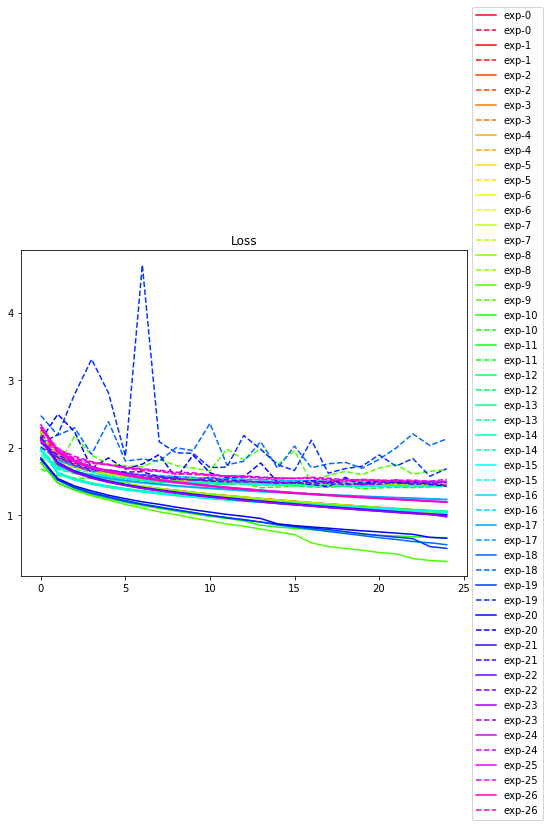

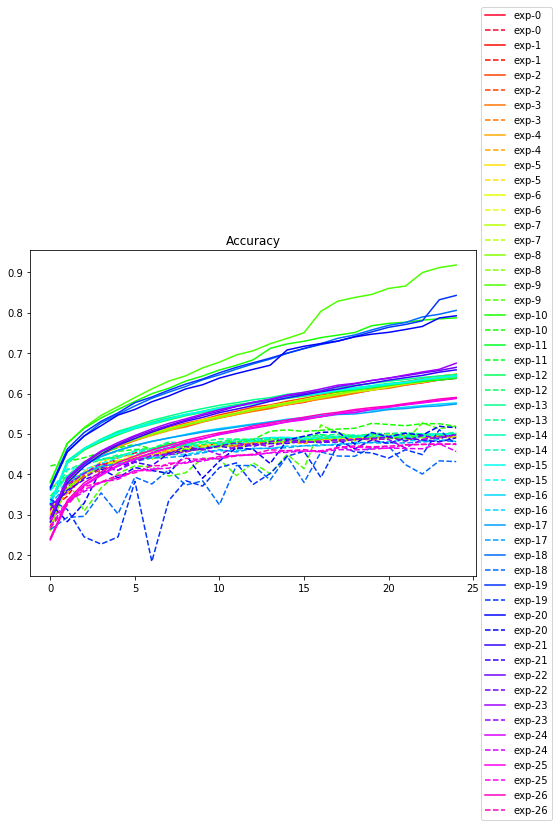

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()